In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/GhazalDataset.zip

In [ ]:
!pip install hazm

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dirpath = "./GhazalDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,در عشق روی او ز حدوث و قدم مپرس گر مرد عاشقی ...,attar
1,عشق توام داغ چنان می‌کند کآتش سوزنده فغان می‌...,attar
2,قصهٔ عشق تو چون بسیار شد قصه‌گویان را زبان از...,attar
3,آن روی به جز قمر که آراید وان لعل به جز شکر ک...,attar
4,دل ز جان برگیر تا راهت دهند ملک دو عالم به یک...,attar
...,...,...
2426,خم زلف تو دام کفر و دین است ز کارستان او یک ش...,hafez
2427,عکس روی تو چو در آینه جام افتاد عارف از خنده ...,hafez
2428,ستاره‌ای بدرخشید و ماه مجلس شد دل رمیده ما را...,hafez
2429,ای آفتاب آینه دار جمال تو مشک سیاه مجمره گردا...,hafez


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,در عشق روی او ز حدوث و قدم مپرس گر مرد عاشقی ز...,attar
1,عشق توام داغ چنان می کند کآتش سوزنده فغان می ک...,attar
2,قصه عشق تو چون بسیار شد قصه گویان را زبان از ک...,attar
3,آن روی به جز قمر که آراید وان لعل به جز شکر که...,attar
4,دل ز جان برگیر تا راهت دهند ملک دو عالم به یک ...,attar
...,...,...
2426,خم زلف تو دام کفر و دین است ز کارستان او یک شم...,hafez
2427,عکس روی تو چو در آینه جام افتاد عارف از خنده م...,hafez
2428,ستاره ای بدرخشید و ماه مجلس شد دل رمیده ما را ...,hafez
2429,ای آفتاب آینه دار جمال تو مشک سیاه مجمره گردان...,hafez


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,عشق حدوث قدم مپرس مرد عاشقی مپرس بگذر ازل ابد ...,attar
1,عشق توام داغ کآتش سوزنده فغان دل دل آتش بسوخت ...,attar
2,قصه عشق قصه زبان کار قصه ره فراوان دین ره دشوا...,attar
3,قمر آراید وان لعل شکر فرساید جان پرده جهان افت...,attar
4,دل جان برگیر راهت ملک عالم آهت برگیری دل جان م...,attar
...,...,...
2426,خم زلف دام کفر دین کارستان شمه جمالت معجز حسن ...,hafez
2427,عکس آینه جام افتاد عارف خنده طمع خام افتاد حسن...,hafez
2428,ستاره بدرخشید ماه مجلس دل رمیده رفیق مونس نگار...,hafez
2429,آفتاب آینه جمال مشک مجمره گردان خال صحن سرای ب...,hafez


In [ ]:
df['cleaned_poems'] = df['poem'].apply(lambda t: normalizer.normalize(t))
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,عشق حدوث قدم مپرس مرد عاشقی مپرس بگذر ازل ابد ...,attar
1,عشق توام داغ کآتش سوزنده فغان دل دل آتش بسوخت ...,attar
2,قصه عشق قصه زبان کار قصه ره فراوان دین ره دشوا...,attar
3,قمر آراید وان لعل شکر فرساید جان پرده جهان افت...,attar
4,دل جان برگیر راهت ملک عالم آهت برگیری دل جان م...,attar
...,...,...
2426,خم زلف دام کفر دین کارستان شمه جمالت معجز حسن ...,hafez
2427,عکس آینه جام افتاد عارف خنده طمع خام افتاد حسن...,hafez
2428,ستاره بدرخشید ماه مجلس دل رمیده رفیق مونس نگار...,hafez
2429,آفتاب آینه جمال مشک مجمره گردان خال صحن سرای ب...,hafez


moulavi    501
attar      500
saadi      500
hafez      495
sanaee     435
Name: poet, dtype: int64


<Axes: >

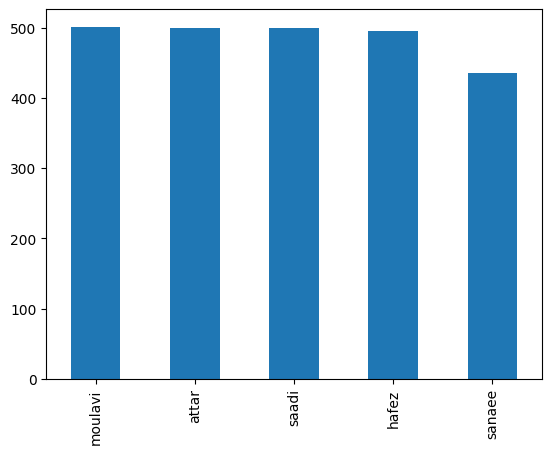

In [ ]:
count = df['poet'].value_counts()

print(count)
count.plot.bar()

In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['attar', 'hafez', 'moulavi', 'saadi', 'sanaee']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,عشق حدوث قدم مپرس مرد عاشقی مپرس بگذر ازل ابد ...,attar,0
1,عشق توام داغ کآتش سوزنده فغان دل دل آتش بسوخت ...,attar,0
2,قصه عشق قصه زبان کار قصه ره فراوان دین ره دشوا...,attar,0
3,قمر آراید وان لعل شکر فرساید جان پرده جهان افت...,attar,0
4,دل جان برگیر راهت ملک عالم آهت برگیری دل جان م...,attar,0
...,...,...,...
2426,خم زلف دام کفر دین کارستان شمه جمالت معجز حسن ...,hafez,1
2427,عکس آینه جام افتاد عارف خنده طمع خام افتاد حسن...,hafez,1
2428,ستاره بدرخشید ماه مجلس دل رمیده رفیق مونس نگار...,hafez,1
2429,آفتاب آینه جمال مشک مجمره گردان خال صحن سرای ب...,hafez,1


In [ ]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'attar': 0, 'hafez': 1, 'moulavi': 2, 'saadi': 3, 'sanaee': 4}
id2label: {0: 'attar', 1: 'hafez', 2: 'moulavi', 3: 'saadi', 4: 'sanaee'}


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
val_data, test_data = train_test_split(test_data, test_size=0.1, random_state=1, shuffle=True)

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoConfig, AutoTokenizer
from transformers import BertConfig, BertTokenizer

MODEL_NAME = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Token indices sequence length is longer than the specified maximum sequence length for this model (520 > 512). Running this sequence through the model will result in indexing errors


max:  677
min:  24


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600')])

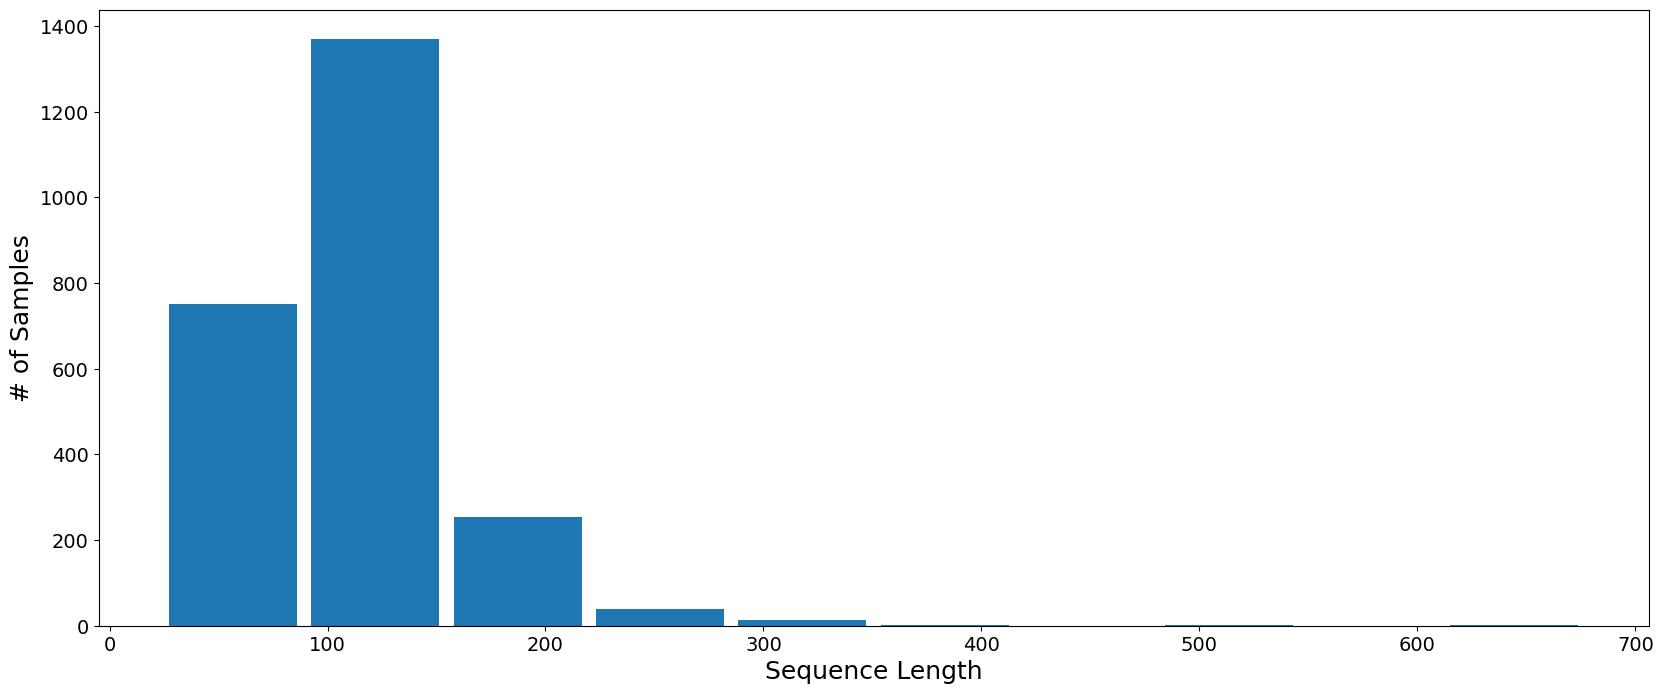

In [ ]:
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.poem.values.tolist(),
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [ ]:
SEQ_LEN = 256
BATCH_SIZE = 20

In [ ]:
tokens = tokenizer(train_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
val_data_tokens = tokenizer(val_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
test_data_tokens = tokenizer(test_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


le = LabelEncoder()
y_train_le = le.fit_transform(train_data['label_id'])
y_valid_le  = le.fit_transform(val_data['label_id'])
y_test_le = le.fit_transform(test_data['label_id'])

hotlabels = to_categorical(y_train_le)
val_labels = to_categorical(y_valid_le)
test_labels = to_categorical(y_test_le)

In [ ]:
import tensorflow as tf

def map_func(input_ids, attention_mask, labels):
    return ({'input_ids': input_ids,
            'attention_mask': attention_mask}, labels)

train_dataset = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], hotlabels))
train_dataset = train_dataset.map(map_func)
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)


val_dataset = tf.data.Dataset.from_tensor_slices((val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_labels))
val_dataset = val_dataset.map(map_func)
val_dataset = val_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tokens['input_ids'], test_data_tokens['attention_mask'], test_labels))
test_dataset = test_dataset.map(map_func)
test_dataset = test_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
from transformers import TFXLMRobertaForSequenceClassification
base_model = TFXLMRobertaForSequenceClassification.from_pretrained(
    "xlm-roberta-base",
    num_labels = len(set(labels)),
    id2label=id2label,
    label2id=label2id,
)

In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')
classificationResult = base_model([input_ids, mask]).logits
Final_output = tf.keras.layers.Dense(5, activation ='softmax', trainable=True)(classificationResult)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=Final_output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 tfxlm_roberta_for_sequence_cla  TFSequenceClassifie  278047493  ['input_ids[0][0]',              
 ssification (TFXLMRobertaForSe  rOutput(loss=None,               'attention_mask[0][0]']         
 quenceClassification)          logits=(None, 5),                                                 
                                 hidden_states=None                                           

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #learning_rate=1e-4, decay=1e-6
loss= tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
f1 = tf.keras.metrics.F1Score(average='weighted', name='f1_score')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc, f1])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
97/97 [==============================] - 200s 1s/step - loss: 1.6140 - accuracy: 0.1959 - f1_score: 0.1597 - val_loss: 1.6047 - val_accuracy: 0.3429 - val_f1_score: 0.2001
Epoch 2/5
97/97 [==============================] - 114s 1s/step - loss: 1.1684 - accuracy: 0.4861 - f1_score: 0.4777 - val_loss: 0.5368 - val_accuracy: 0.7667 - val_f1_score: 0.7125
Epoch 3/5
97/97 [==============================] - 115s 1s/step - loss: 0.5119 - accuracy: 0.8015 - f1_score: 0.8033 - val_loss: 0.4584 - val_accuracy: 0.8405 - val_f1_score: 0.8436
Epoch 4/5
97/97 [==============================] - 112s 1s/step - loss: 0.3873 - accuracy: 0.8572 - f1_score: 0.8598 - val_loss: 0.3298 - val_accuracy: 0.9000 - val_f1_score: 0.9015
Epoch 5/5
97/97 [==============================] - 112s 1s/step - loss: 0.2654 - accuracy: 0.9165 - f1_score: 0.9173 - val_loss: 0.2543 - val_accuracy: 0.9357 - val_f1_score: 0.9355


In [ ]:
final_accuracy = history.history['val_accuracy']

print('FINAL ACCURACY: ', np.mean(final_accuracy))

FINAL ACCURACY:  0.757142859697342


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

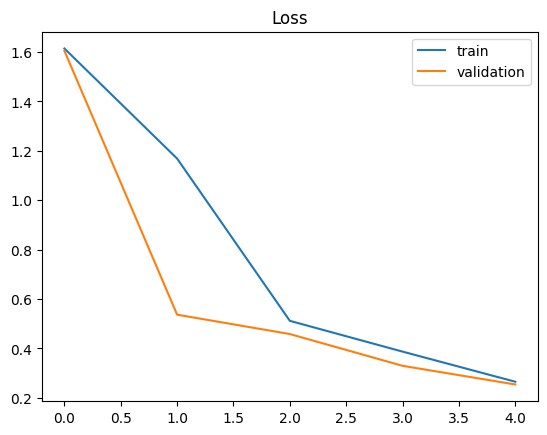

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [ ]:
def prep_data(text):
    tokens = tokenizer(text, max_length=SEQ_LEN, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return ({'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']})

In [ ]:
import numpy as np

test_data['predicted-label'] = None
# i = 0
for i, text in zip(test_data.index, test_data['poem']):
    tokens = prep_data(text)
    probs = model.predict(tokens)
    pred = np.argmax(probs)
    test_data['predicted-label'][i] = pred


In [ ]:
testlist = test_data['label_id'].tolist()
predlist = test_data['predicted-label'].tolist()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(testlist, predlist, target_names=labels))

              precision    recall  f1-score   support

       attar       0.83      1.00      0.91        10
       hafez       1.00      1.00      1.00         6
     moulavi       1.00      0.69      0.82        13
       saadi       0.91      1.00      0.95        10
      sanaee       0.73      0.80      0.76        10

    accuracy                           0.88        49
   macro avg       0.89      0.90      0.89        49
weighted avg       0.89      0.88      0.87        49



<Axes: >

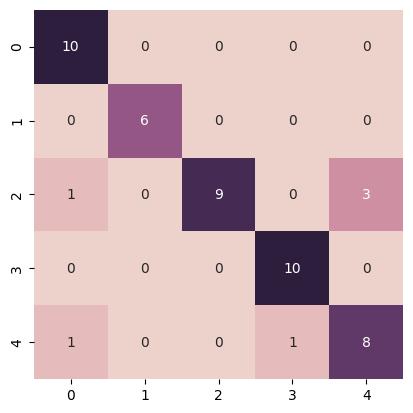

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(testlist, predlist)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
str = "دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود از خود خبر تا بی خبر چون آمدم دستم چو از نیرنگ او آمد به زیر سنگ او بر چهرهٔ گلرنگ او چون لاله در خون آمدم گاهی ز جان بی جان شدم گاهی ز دل بریان شدم هر لحظه دیگر سان شدم هر دم دگرگون آمدم در فرقت آن نازنین گشتم همه روی زمین گویی نبودم پیش ازین عاشق هم اکنون آمدم چون نیستی اندر عیان، در نیستی گشتم نهان تا هرچه دیدم در جهان از جمله بیرون آمدم از فقر رو کردم سیه عطار را کردم تبه رفعت رها کردم به ره از خویش بیرون آمدم"


In [ ]:
df1 = pd.DataFrame(columns=['poem', 'poet'])
df1.loc[0] = [str, "saadi"]
df1

,poem,poet
0,دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود ا...,saadi


In [ ]:
id_label_map = {
    "attar": 0,
    "hafez": 1,
    "moulavi": 2,
    "saadi": 3,
    "sanaee": 4
}
df1['poet'] = df1['poet'].map(id_label_map)
df1

,poem,poet
0,دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود ا...,3


In [ ]:
df1.loc[0].values

array(['دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود از خود خبر تا بی خبر چون آمدم دستم چو از نیرنگ او آمد به زیر سنگ او بر چهرهٔ گلرنگ او چون لاله در خون آمدم گاهی ز جان بی جان شدم گاهی ز دل بریان شدم هر لحظه دیگر سان شدم هر دم دگرگون آمدم در فرقت آن نازنین گشتم همه روی زمین گویی نبودم پیش ازین عاشق هم اکنون آمدم چون نیستی اندر عیان، در نیستی گشتم نهان تا هرچه دیدم در جهان از جمله بیرون آمدم از فقر رو کردم سیه عطار را کردم تبه رفعت رها کردم به ره از خویش بیرون آمدم',
       3], dtype=object)

In [ ]:
df1['cleaned_poem'] = df1['poem'].apply(cleaning)
df1 = df1[['cleaned_poem', 'poet']]
df1.columns = ['poem', 'poet']
df1

,poem,poet
0,دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود ا...,3


In [ ]:
df1['cleaned_poem'] = df1['poem'].apply(removeStopWords)
df1 = df1[['cleaned_poem', 'poet']]
df1.columns = ['poem', 'poet']
df1

,poem,poet
0,دوش وثاق دلبری سرمست آمدم هیچم خبر خبر آمدم دس...,3


In [ ]:
t = tokenizer(df1['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
df1['poem'].tolist()

['دوش وثاق دلبری سرمست آمدم هیچم خبر خبر آمدم دستم نیرنگ سنگ چهره گلرنگ لاله خون آمدم جان جان دل بریان لحظه سان دگرگون آمدم فرقت نازنین گشتم زمین نبودم عاشق آمدم نیستی عیان نیستی گشتم نهان دیدم جهان آمدم فقر سیه عطار تبه رفعت رها ره آمدم']

In [ ]:
import numpy as np

# test_data['predicted-label'] = None
df1['predicted-label'] = None
# i = 0
# for i, text in zip(0, df1['poem']):
tokens = prep_data(df1['poem'].tolist())
pr = model.predict(tokens)
predict = np.argmax(probs)
df1['predicted-label'] = pred

1/1 [==============================] - 0s 69ms/step


In [ ]:
pred

0

In [ ]:
idToLabel = [ "attar",
    "hafez",
    "moulavi",
    "saadi",
    "sanaee"]

print(idToLabel[pred])


attar
